# Introduction
Image classification is always the fascinating projects from the students who begin to learn about machine learning to the senior scientists. MNIST can be considered as the first homework for anyone who is interested in this area. This dataset contains about 70000  small images of digits handwritten by highshool students and employees of the US Cencus Bureau and it was normalized to fit into a 28x28 pixel bounding box.

In this project, as the beginner of image classification, my main aim is not to train the model with the accuracy of 99%. I will focus the accuracy and also training-time of the classifier on the original data and the reduced data with PCA technique. At the end, I will apply some dimension reduction technique to plot MNIST dataset in 2D scatterplot to choose which technique can seperate MNIST the best

In [1]:
#Library needed
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
mnist=fetch_openml("mnist_784",version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
#Set X as data and y is label of MNIST data
X,y=mnist['data'],mnist['target']
#Seperate train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)



In [3]:
print(X.shape)

(70000, 784)


As I mentioned above, since each image is 28 pixels in height and 28 pixels in width, we need reshape to form the whole number based on 784 pixels available

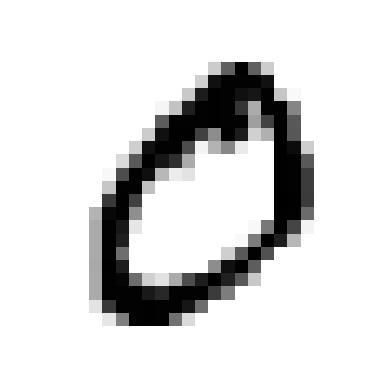

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

digit=X[1]
digit_image=digit.reshape(28,28)

plt.imshow(digit_image,cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [5]:
# it is clear that this is number 0, but we need to check with data
y[1]

'0'

In [6]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

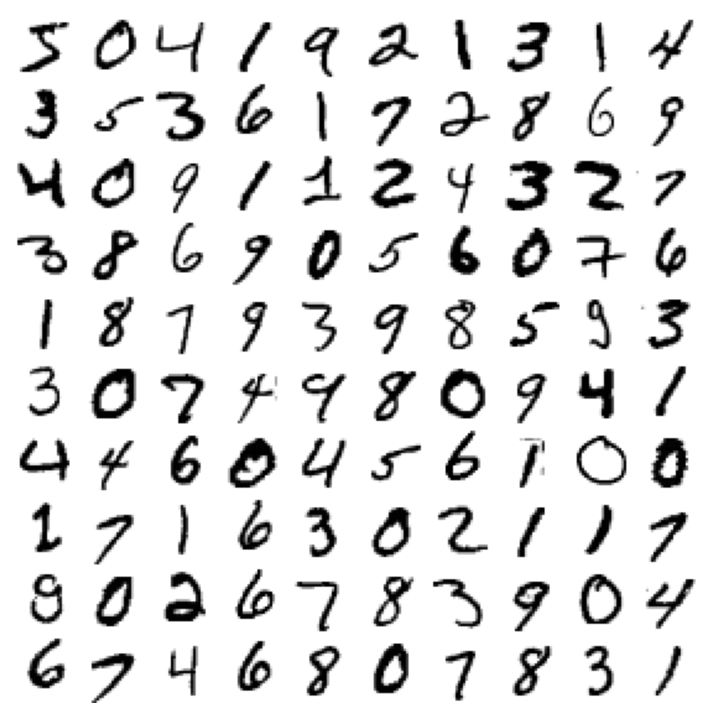

In [7]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

We can see that dataset contains 784 pixels, means 784 columns which is quite large. Hence, it can take a long time to run the model on this data. Therefore, to avoid this computational problem, I will apply PCA to reduce the dimension but still explain 95% variance of MNIST data.

Text(0, 0.5, 'Explained variance ')

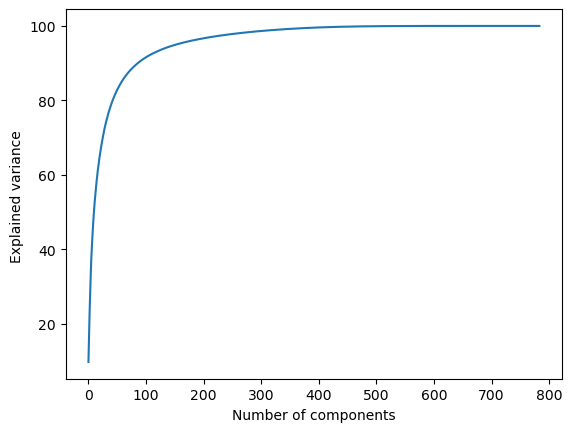

In [8]:
# Since we choose the components is 784, also the number of columns.
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance ")

We can see that around 150 components can explain more than 90% dataset.

After applying PCA, our dataset will be reduced to lower dimension and it could be lost more information. Hence, we are doubt about the quality of image after reduction. I will compare the original dataset, with reduced data with PCA exlain 50%, 75% and 95% respectively.


In [9]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

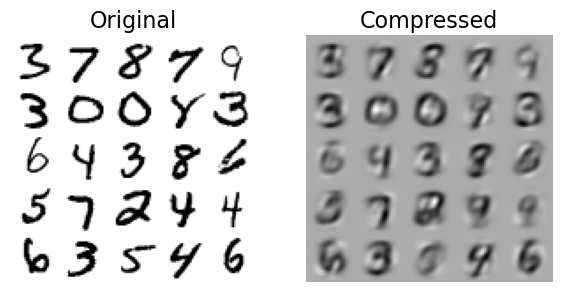

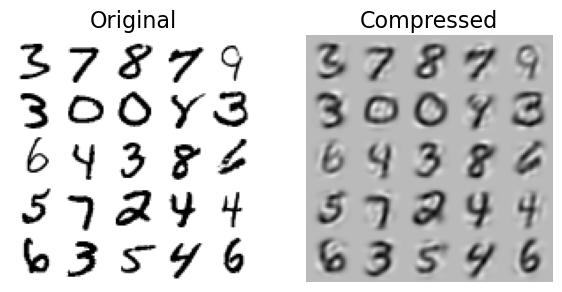

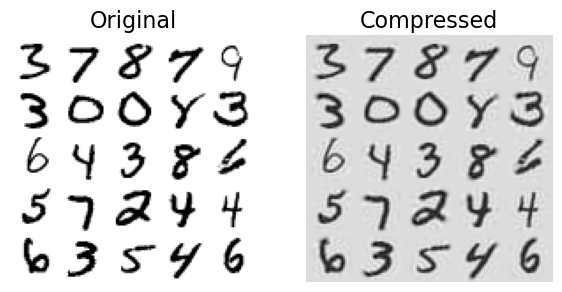

In [10]:
ratio=[0.5,0.75,0.95]
for i in ratio:
    pca=PCA(n_components=i)
    pca.fit(X_train)
    X_pca=pca.transform(X_train)
    X_recovered=pca.inverse_transform(X_pca)
    plt.figure(figsize=(7, 4))
    plt.subplot(121)
    plot_digits(X_train[::2100])
    plt.title("Original", fontsize=16)
    plt.subplot(122)
    plot_digits(X_recovered[::2100])
    plt.title("Compressed", fontsize=16)


    


Obviously, reduced dataset with 95% exlained variance shows the image much clear than 50% and 75%. Moreover, it's hard to recognize the difference between the original data and reduced data wich PCA 95% variance. Therefore, applying PCA in this situation can be the good strategy for our project.

In [11]:
pca_95=PCA(n_components=0.95)
X_pca=pca_95.fit_transform(X)
pca_95.n_components_
print(X_pca.shape)

X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,random_state=10)

(70000, 154)


We will apply PCA to reduce from 784 pixels to only 154 pixels but the new data still explain 95% variance of the original ones

In [12]:
#Logistic regression
lr=LogisticRegression(max_iter=500,random_state=43)


In [13]:
import time
t0 = time.time()
lr.fit(X_train,y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 28.93s


C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
predict_value=lr.predict(X_test)
print(accuracy_score(y_test,predict_value))



0.9162285714285714


In [15]:
import time
t0=time.time()
lr.fit(X_train_pca,y_train_pca)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 12.11s


C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
predict_value=lr.predict(X_test_pca)
print(accuracy_score(y_test_pca,predict_value))

0.9178857142857143


When we apply Logistic Regression on original data, it took 28.93s to train model on training dataset, but only 12.11s needed for reduced training dataset. Moreover, we see the accuracy of Logistic Regression classifier on the reduced data is a little bit higher than the original.

It could be the suprising case since when we reduce the columns from 784 to 154, there was some of information eliminated from the reduced dataset; it means that the model could not learn the full information from the new data as the original data, which lead to less accuracy than the result of itself when trained on the original dataset. However, the result from our Logistic Regression was amazing when it not only lower the training-time but also increasing the accuracy.

We will train more models to see which model is better than Logistic Regression

In [17]:
#Decision tree
decision_tree=DecisionTreeClassifier(criterion="entropy",
                                    max_depth=15,
                                    max_features="sqrt")
#Train on original data
time0=time.time()
decision_tree.fit(X_train,y_train)
time1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=decision_tree.predict(X_test)
print(accuracy_score(predict_value,y_test))

Training took 12.11s
0.8386857142857143


In [18]:
#Train on reduced data
time0=time.time()
decision_tree.fit(X_train_pca,y_train_pca)
time1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=decision_tree.predict(X_test_pca)
print(accuracy_score(predict_value,y_test_pca))

Training took 12.11s
0.7172571428571428


Decision Tree classifier result of reduced data is not good, when the training-time is not faster compared to the original data but the accuracy is also much lower.

In [19]:
#Random Forest
rf=RandomForestClassifier(max_depth=15,max_features="sqrt",n_estimators=150)
t0=time.time()
rf.fit(X_train,y_train)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=rf.predict(X_test)
print(accuracy_score(predict_value,y_test))

Training took 28.03s
0.9634857142857143


In [20]:
t0=time.time()
rf.fit(X_train_pca,y_train_pca)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=rf.predict(X_test_pca)
print(accuracy_score(predict_value,y_test_pca))

Training took 58.50s
0.9422857142857143


The result from Random Forest was supprising, when the training-time of RF on the reduced data is much longer than on the original data, and the accuracy is also lower.

In [21]:
#KNN
knn=KNeighborsClassifier(n_neighbors=4)
t0=time.time()
knn.fit(X_train,y_train)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=knn.predict(X_test)
print(accuracy_score(predict_value,y_test))

Training took 0.05s
0.9708


C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
#Train on reduced data
t0=time.time()
knn.fit(X_train_pca,y_train_pca)
t1=time.time()
print("Training took {:.2f}s".format(t1 - t0))
predict_value=knn.predict(X_test_pca)
print(accuracy_score(predict_value,y_test_pca))

Training took 0.04s
0.9731428571428572


C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The results of KNN on both original data, and reduced data are extremely well, when it took only less than 0.06s to train the model on both data. However, there is one thing to notice that at this time, KNN works better on the reduced dataset when

In four models that we have trained, KNN works the best, with low training-time and high accuracy. Especially KNN only needs around 0.05s to train the model on the original data and have the accuracy of 97%. 

# Visualization

In this section, we use some dimension technique such as PCA, TSNE to visualize the MNIST dataset on two dimension

In [23]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]
import numpy as np
y = y.astype(np.uint8)

PCA took 0.2s.


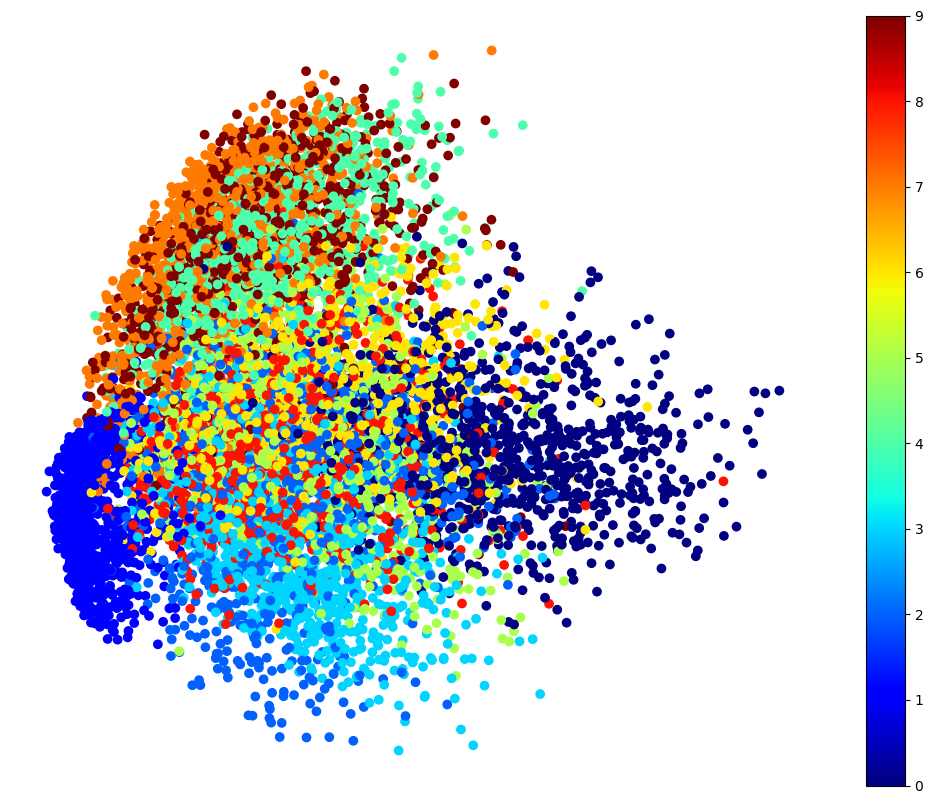

In [24]:
#PCA
t0=time.time()
X_pca_2=PCA(n_components=2).fit(X).transform(X)
t1=time.time()
print("PCA took {:.1f}s.".format(t1-t0))
plt.figure(figsize=(13,10))
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c=y,cmap='jet')

plt.axis("off")
plt.colorbar()
plt.show()

We know that PCA is a good technique in reducing the dimensionality. However, it only works well on linear dataset. Since MNIST is non-linear data, the PCA did not do a good job at separting 10 digits. We hardly see the clear separation between each label, so many overlap occurs in the scatterplot. 



LLE took 17.1s


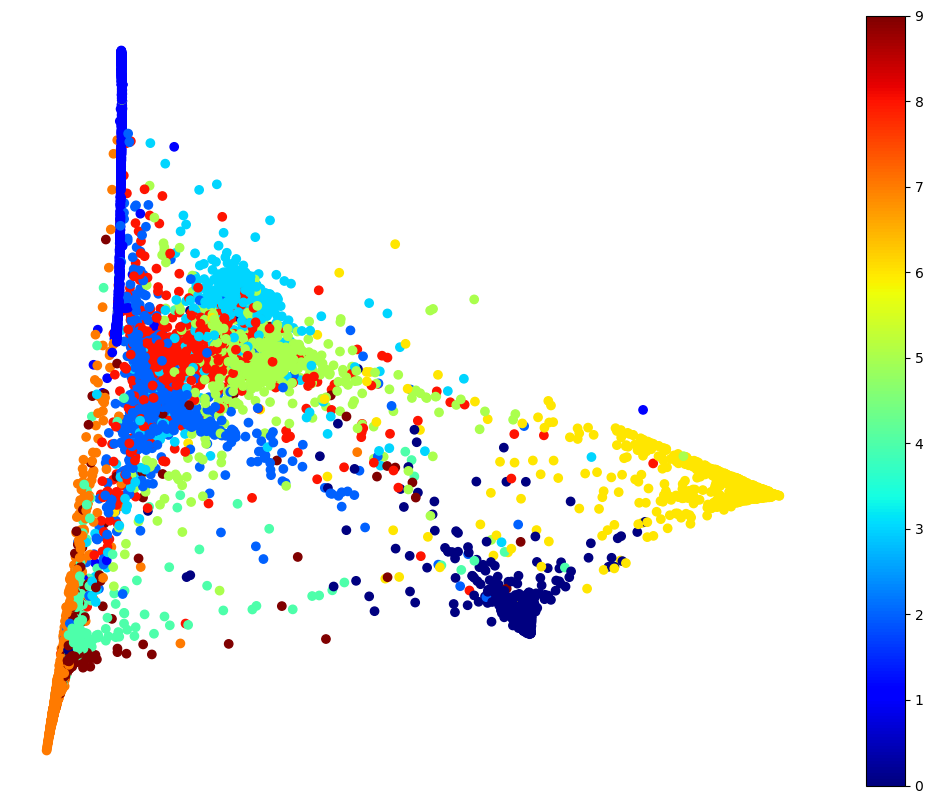

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
t0=time.time()
X_lle=LocallyLinearEmbedding(n_components=2).fit_transform(X)
t1=time.time()
print("LLE took {:.1f}s".format(t1-t0))
plt.figure(figsize=(13,10))
plt.scatter(X_lle[:,0],X_lle[:,1],c=y,cmap='jet')
plt.axis("off")
plt.colorbar()
plt.show()

LLE is much lower than PCA but also does not separate 10 labels clearly

C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE took 19.1s


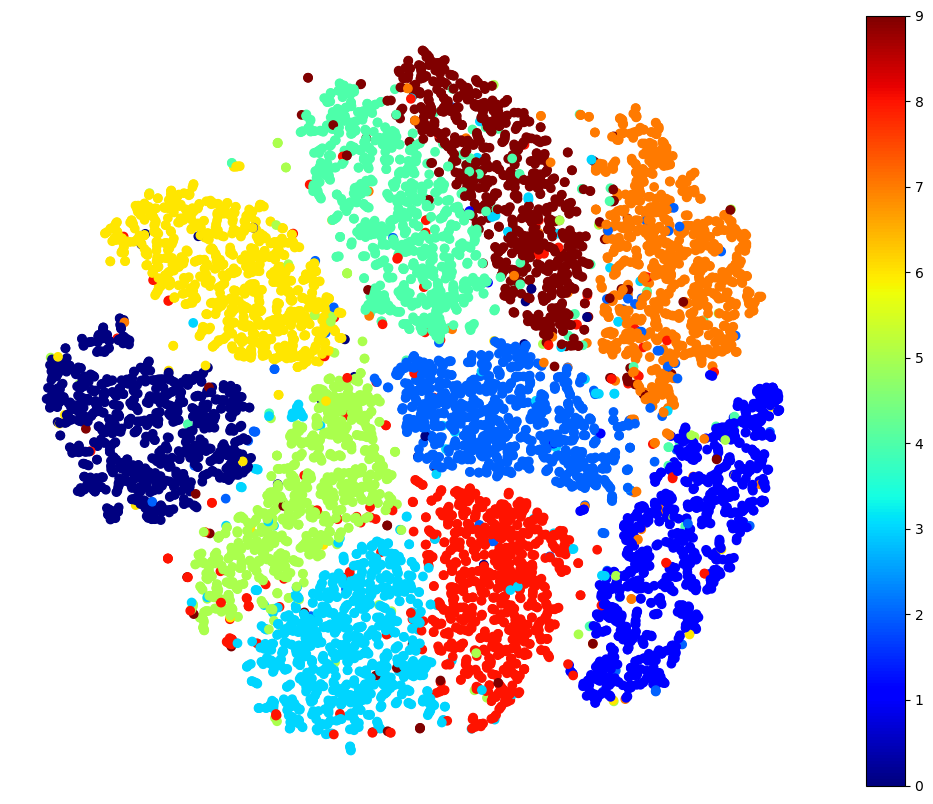

In [26]:
from sklearn.manifold import TSNE
t0=time.time()
X_tsne = TSNE(n_components=2,perplexity=10, random_state=42).fit_transform(X)
t1=time.time()
print("TSNE took {:.1f}s".format(t1-t0))
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

TSNE result is amazing, when the clusers of 10 groups are separated clearly. And it only took 19.1s.

LDA took 0.9s


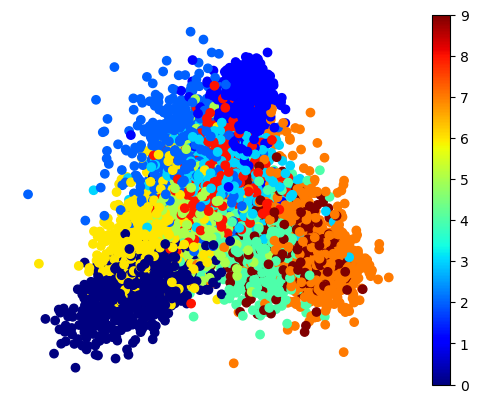

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
t0=time.time()
X_lda=LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)
t1=time.time()
print("LDA took {:.1f}s".format(t1-t0))
plt.plot(figsize=(13,10))
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='jet')
plt.axis("off")
plt.colorbar()
plt.show()

LDA is the classification method, but sometimes it can work well on separating dataset. However, since LDA only took 0.9s to visualize the MNIST dataset, but there were so many overlaps between 10 groups.

KernelPCA took 4.682451s


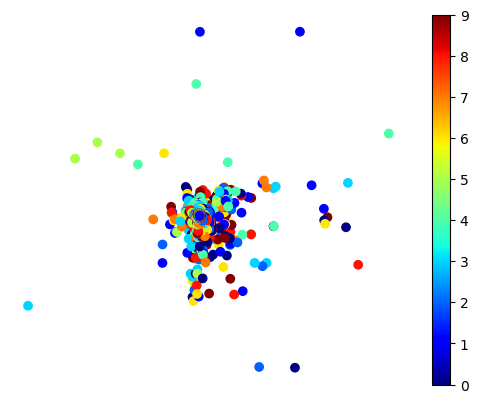

In [30]:
from sklearn.decomposition import KernelPCA
t0=time.time()
X_kpca=KernelPCA(n_components=2,kernel='rbf',gamma=10).fit_transform(X)
t1=time.time()
print("KernelPCA took {:1f}s".format(t1-t0))
plt.plot(figsize=(13,10))
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=y,cmap='jet')
plt.axis("off")
plt.colorbar()
plt.show()

Kernal PCA is developed from PCA, and it is used for non-linear dataset. However, the result of Kernel PCA seems not good, when there were no clear cluster between each group.

Now, usually some dimensionaly reduction technique can only reduce the dimensionality and then visualize it but without transforming dataset into lower dimension as PCA or Kernel PCA. Therefore, our strategy is to apply PCA to lower dimensionality and then apply other method to speed up the visualize time.

PCA and LLE took 18.645460s


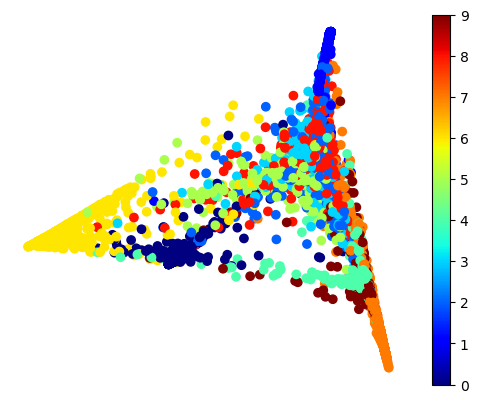

In [28]:
#now we transform data first, and then apply tsne, lle to if there is any improvement in seperating and reduced time
from sklearn.pipeline import Pipeline
pca_lle=Pipeline([
    ("pca",PCA(n_components=0.95)),
    ("lle",LocallyLinearEmbedding(n_components=2))
])
t0=time.time()
X_pca_lle=pca_lle.fit_transform(X)
t1=time.time()
print("PCA and LLE took {:1f}s".format(t1-t0))
plt.plot(figsize=(13,10))
plt.scatter(X_pca_lle[:,0],X_pca_lle[:,1],c=y,cmap='jet')
plt.axis("off")
plt.colorbar()
plt.show()

The result of conbination PCA and LLE is not expected since the training-time is slower than LLE itself.

C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Quoc Nguyen\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA and TSNE took 19.496054s


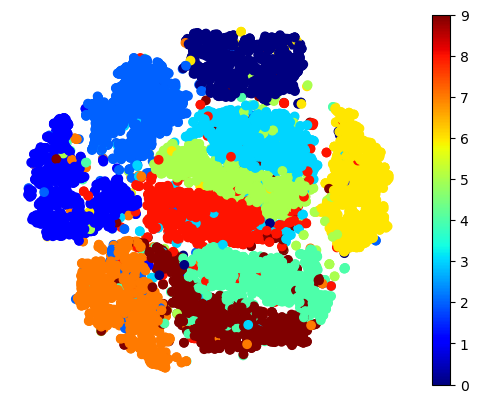

In [29]:
pca_tsne=Pipeline([
    ('pca',PCA(n_components=0.95)),
    ('tsne',TSNE(n_components=2,perplexity=10))
])
t0=time.time()
X_pca_tsne=pca_tsne.fit_transform(X)
t1=time.time()
print("PCA and TSNE took {:1f}s".format(t1-t0))
plt.plot(figsize=(13,10))
plt.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1],c=y,cmap='jet')
plt.axis("off")
plt.colorbar()
plt.show()

When we combine PCA and TSNE, the training-time is not faster than when we train only TSNE. And the separation between clusters is also not clear than it before.

# Conclusion
In conclusion, we have some notice after comparing the result of classification methods on the original and reduced MNIST dataset. 

First, we can see that some models, especially works well without reducing the dimensionality such as KNN, when KNN classifier still trained extremely fast (0.05s) on the dataset with 784 columns and had the accuracy of 97%. Moreover, the results from our project were not as we expect since the accuracy of classification models on the reduced dataset is higher the result of classifier on the original data. However, it is not the big problem since we not only speed up the training time but also gain the higher accuracy

Finally, from the visulization, we see that TSNE works the best on separating each groups on 2D scatterplot, with the time of 19.1s. One thing that was suprising is that when we apply PCA before using other dimensionality reduction technique, the training time could not speed up faster as we thought.